In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
import matplotlib as mpl
import matplotlib.ticker as ticker
from scipy.stats import norm

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['lines.markersize'] = 6

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.markerscale'] = 1.5

In [20]:
def GetFigure(x,y,name_='',xlabel_ = '',ylabel_ = ''):
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Plotting zone
    ax.plot(x,y,color='yellowgreen',label=r'$f(\mathcal{Q},0)$')
    ax.plot(x,y1,color='gold',label=r'$f(\mathcal{Q},1)$')
    ax.axvline(x = QObs, color='k', ls='--',label=r'$\mathcal{Q}_{observed}$')
    
    # Pvalues
    p0scan = np.linspace(x[0],QObs,100)
    ax.fill_between(p0scan,0,norm.pdf(p0scan,loc = 3, scale=2.),color='g',label=r'$p_{0}$')

    p1scan = np.linspace(QObs,x[-1],100)
    ax.fill_between(p1scan,0,norm.pdf(p1scan,loc = -1, scale=2.1),color='y',label=r'$p_{1}$')
 
    ###################################################
    
    # XLabel
    if xlabel_ == '':
        ax.set_xlabel(xlabel_)
    else:
        ax.set_xlabel(r'$'+xlabel_+'$')
    
    # XLabel position
    ax.xaxis.set_label_coords(0.95,-0.1)
    
    # YLabel 
    if ylabel_ == '':
        ax.set_ylabel(ylabel_)
    else:
        ax.set_ylabel(r'$'+ylabel_+'$')
    
    # YLabel position
    ax.yaxis.set_label_coords(-0.1,0.95)
    
    # Tickers
    scale_ = 1.
    ticks_x = ticker.FuncFormatter(lambda x,pos:'{:.2f}'.format(x/scale_)) 
    ax.xaxis.set_major_formatter(ticks_x)
    ticks_y = ticker.FuncFormatter(lambda y,pos:'{:.2f}'.format(y/scale_))
    ax.yaxis.set_major_formatter(ticks_y)
    
    # Legend
    ax.legend(loc=0)
    
    # Saving step
    folder = './'
    folder += name_
    
    plt.savefig(folder)

In [21]:
x = np.linspace(-10,10,50)
y0 = norm.pdf(x,loc = 3, scale=2)
y1 = norm.pdf(x,loc = -1, scale=2.1)
QObs = -0.5

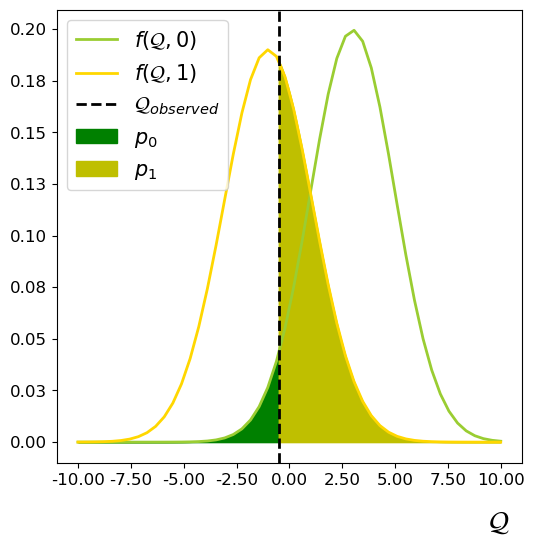

In [23]:
GetFigure(x,y0,name_='LnQestimator.pdf',xlabel_='\mathcal{Q}',ylabel_='')